# Network Traffic Analysis *Project*

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
import copy
import pandas
import numpy as np

def load_data(fname):
  '''
  load the data in fname into a pandas dataframe and return it
  '''
  df = pandas.read_csv(fname)
  return df

# folder_path = '/content/drive/MyDrive/CS345/Wed_Oct_11/NetworkTraffic/MachineLearningCVE/'
folder_path = './NetworkTraffic/MachineLearningCVE/'
fname1 = folder_path + 'Monday-WorkingHours.pcap_ISCX.csv'
fname2 = folder_path + 'Tuesday-WorkingHours.pcap_ISCX.csv'
fname3 = folder_path + 'Wednesday-workingHours.pcap_ISCX.csv'
fname4 = folder_path + 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
fname5 = folder_path + 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
fname6 = folder_path + 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
fname7 = folder_path + 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
fname8 = folder_path + 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df1, df2, df3, df4, df5, df6, df7, df8 = load_data(fname1), load_data(fname2), load_data(fname3), load_data(fname4), load_data(fname5), load_data(fname6), load_data(fname7), load_data(fname8)


df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
dfs = copy.deepcopy(df_list)

# replace infinity and nan with 0
for i in range(len(dfs)):
  dfs[i].replace([np.inf, -np.inf], np.nan, inplace=True)
  dfs[i] = dfs[i].fillna(0) # or df = df.dropna()

In class we have covered binary classification (e.g., spam v. ham, fake v. real etc.). In this assignment, you will perform multi-class classification using the network traffic data.

We want you to do this in two ways:

**Direct Multi-Class Classification [KNN [Done], DT [Done], NN, etc]**

Directly use our previous methods for binary classification (Decision Trees, KNN, Perceptron, Neural Networks) to predict multiple classes.

**Today: Direct Multi-Class Classification with Resampling**

Resample the large, unbalanced dataset to have a smaller and more balanced dataset for classifier


In [4]:
import numpy as np
import pandas as pd
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

##### using MLP classifier (as NN is supposed to be able to deal with big data) #####

# merge all the dataframes to be one
df = pd.concat(dfs[1:])
df.to_csv(path_or_buf = folder_path + 'clean_traffic_data.csv' , index=False)


## Count data for each label 

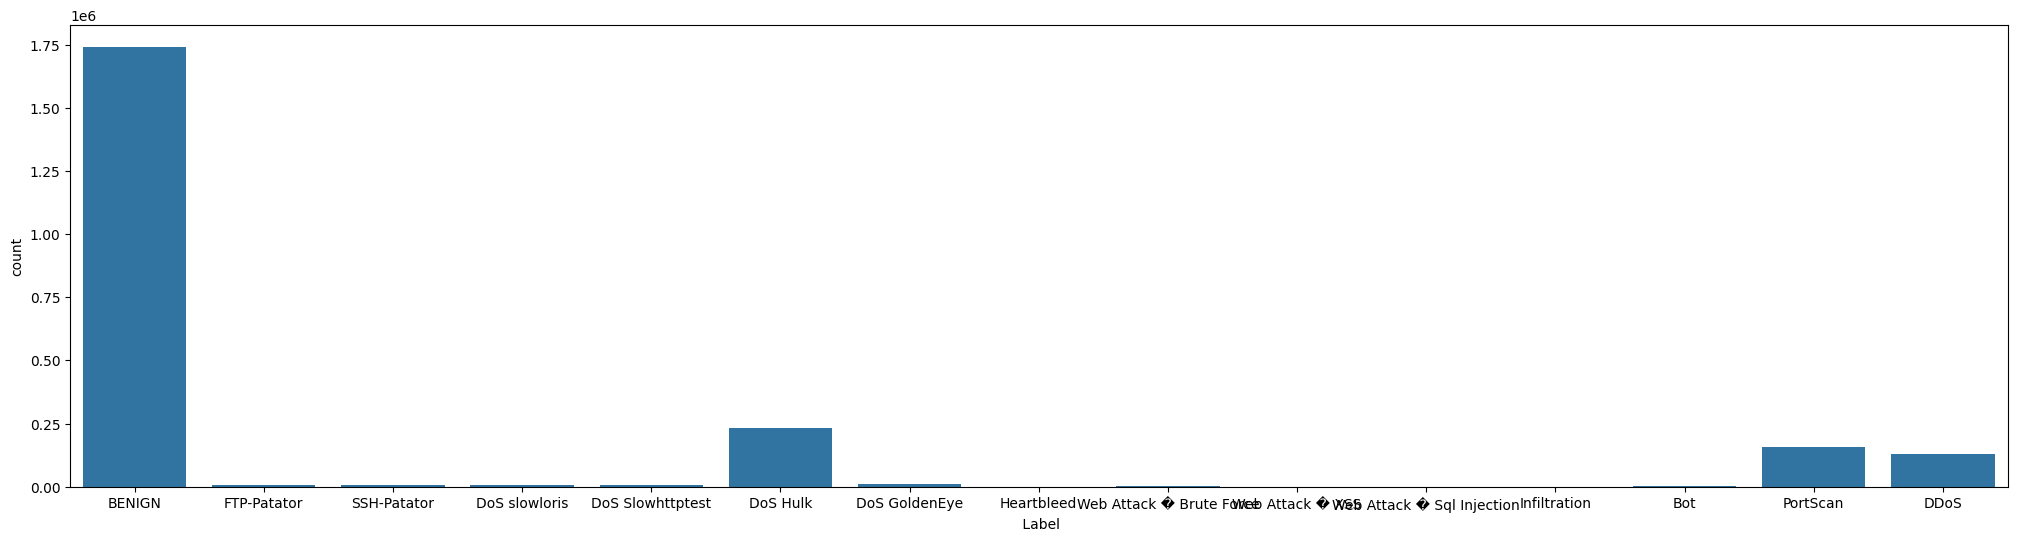

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# folder_path = '/content/drive/MyDrive/CS345/Wed_Oct_11/NetworkTraffic/MachineLearningCVE/'
folder_path = './NetworkTraffic/MachineLearningCVE/'
df = pd.read_csv(folder_path + 'clean_traffic_data.csv')
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df)
plt.show()

## Count data for malicious label 

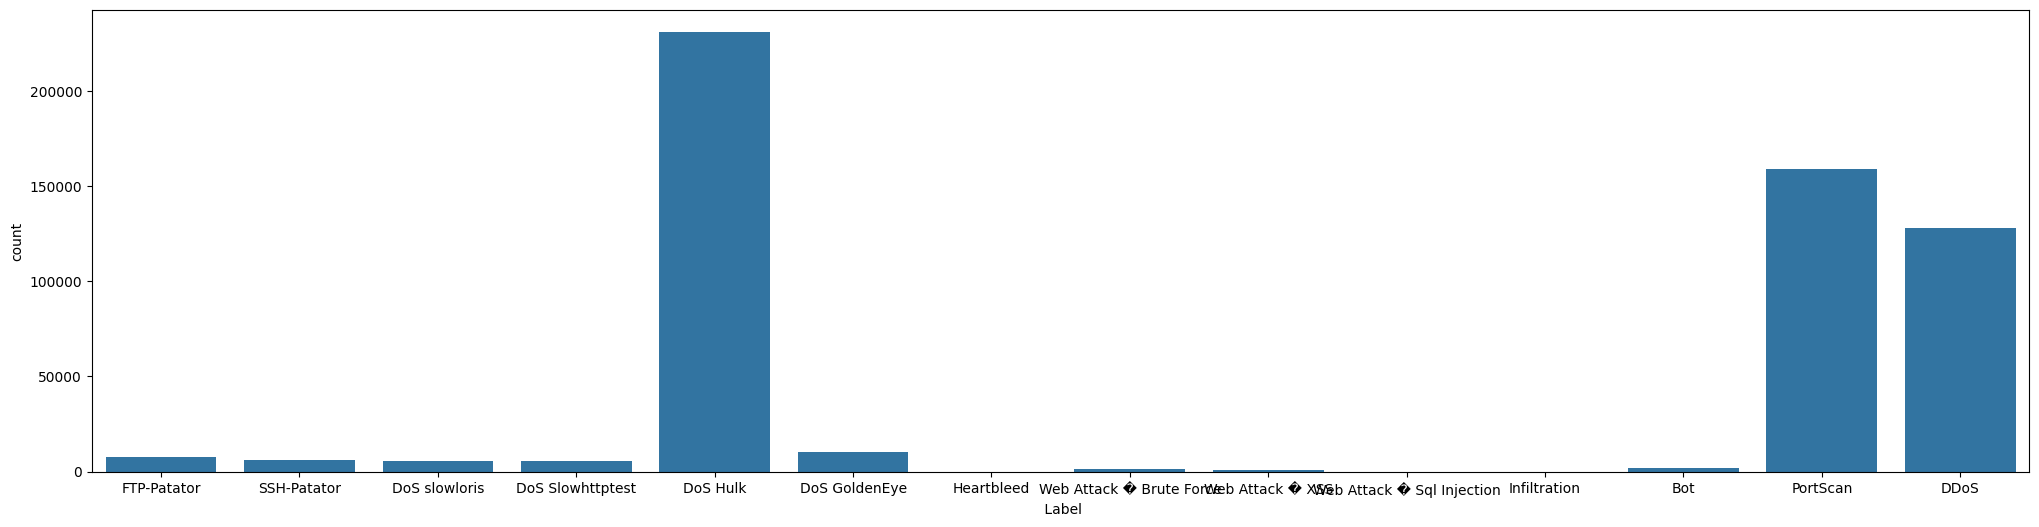

In [6]:
df_plot = df[df[' Label'] != 'BENIGN']
fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=df_plot)
plt.show()

## Direct Multi-Class Classification and resampling

### RandomUnderSampler

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler.fit_resample

# before directly split the data into training and testing sets, I will do undersampling first to deal with the unbalanced dataset
# folder_path = '/content/drive/MyDrive/CS345/Wed_Oct_11/NetworkTraffic/MachineLearningCVE/'

# df = pd.read_csv(folder_path + 'clean_traffic_data.csv')
num_benign = sum(df[' Label'] != 'BENIGN')
rus = RandomUnderSampler(sampling_strategy= 'majority', random_state=2)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# resample
X_resampled, y_resampled = rus.fit_resample(X, y)
resampled_df = pd.DataFrame(columns=df.columns)

resampled_df[resampled_df.columns[:-1]] = X_resampled
resampled_df[resampled_df.columns[-1]] = y_resampled

# resampled_df.to_csv(path_or_buf = folder_path + 'resampled_clean_traffic_data.csv' , index=False)


### Count data for all labels with undersampling

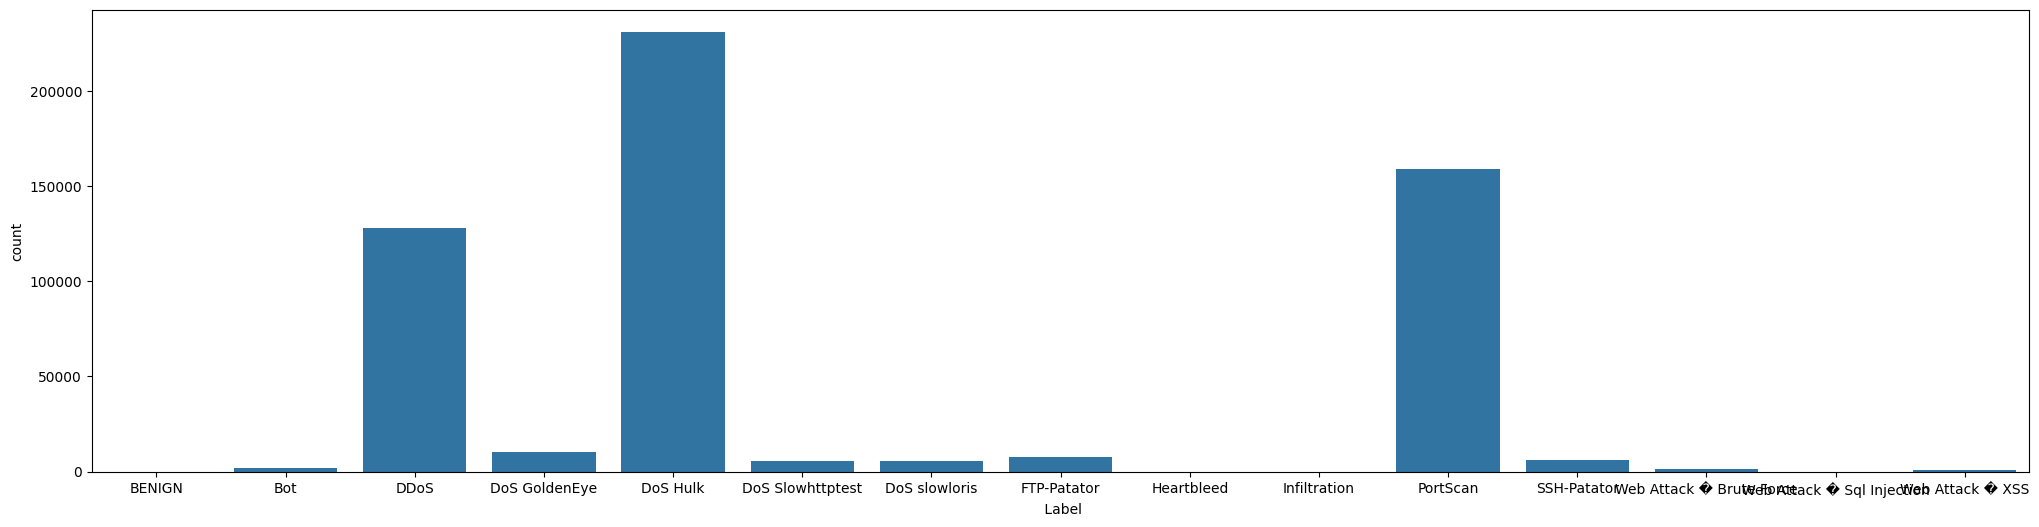

In [10]:

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=resampled_df)
plt.show()


### RandomUnderSampler example 2

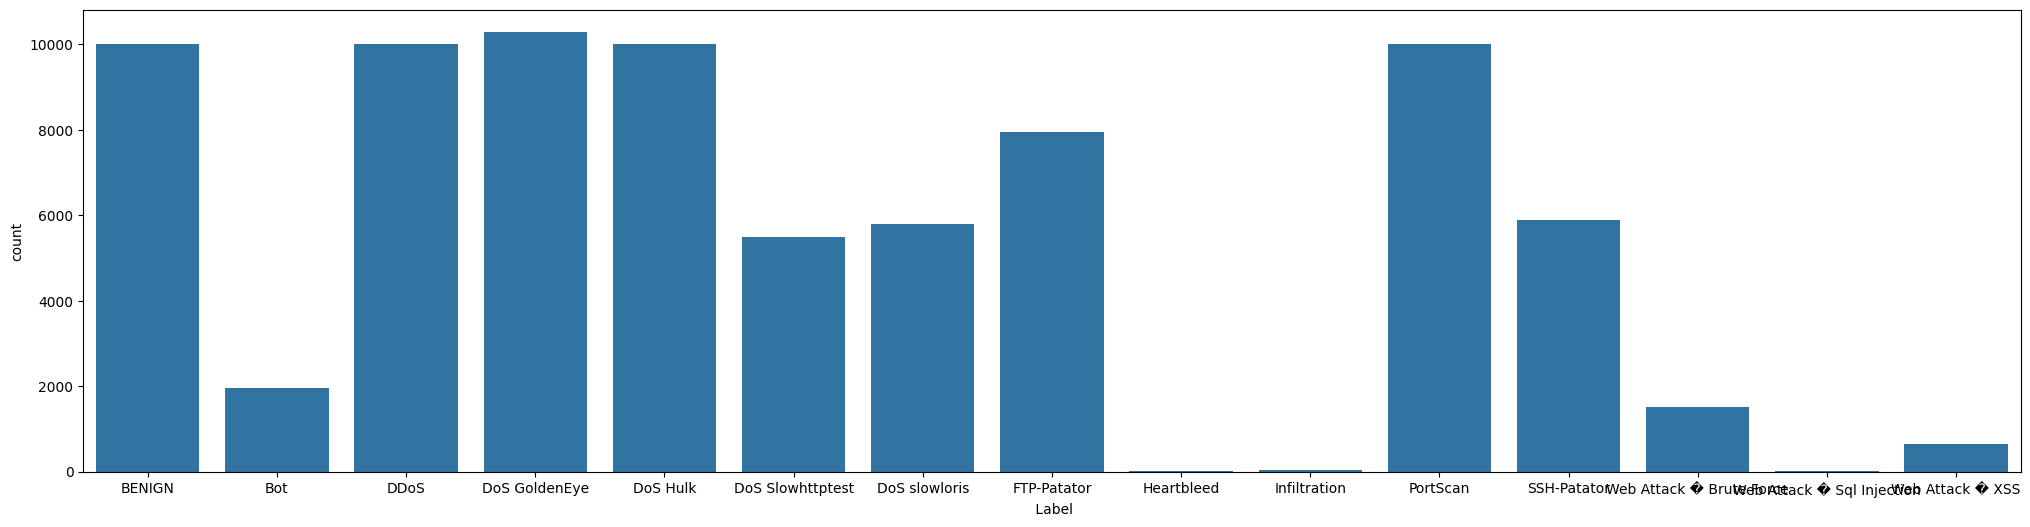

In [12]:
num_benign = sum(df[' Label'] != 'BENIGN')
rus = RandomUnderSampler(sampling_strategy= {'BENIGN': 10000, 'DDoS': 10000, 'DoS Hulk': 10000, 'PortScan': 10000}, random_state=2)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# resample
X_resampled, y_resampled = rus.fit_resample(X, y)
resampled_df = pd.DataFrame(columns=df.columns)

resampled_df[resampled_df.columns[:-1]] = X_resampled
resampled_df[resampled_df.columns[-1]] = y_resampled

# resampled_df.to_csv(path_or_buf = folder_path + 'resampled_clean_traffic_data.csv' , index=False)

fig = plt.figure(figsize=(25,6))
sns.countplot(x=' Label', data=resampled_df)
plt.show()


In [13]:
print(sum(resampled_df[' Label'] != 'BENIGN'))

69616


## train MLPClassifier model after resampling

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

mask = np.random.rand(len(resampled_df)) < 0.8
df_train = resampled_df[mask]
df_test = resampled_df[~mask]

X_train = df_train[df_train.columns[:-1]]
y_train = df_train[df_train.columns[-1]]

X_test = df_test[df_test.columns[:-1]]
y_test = df_test[df_test.columns[-1]]

# training
mlp = MLPClassifier(hidden_layer_sizes=(40,), random_state=1, max_iter=300).fit(X_train, y_train)

# prediction
pred = mlp.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.87730
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.84      0.82      0.83      1930
                       Bot       0.72      0.92      0.81       377
                      DDoS       0.90      0.84      0.87      2004
             DoS GoldenEye       0.97      0.98      0.98      2027
                  DoS Hulk       0.88      0.89      0.89      2024
          DoS Slowhttptest       0.71      0.84      0.77      1124
             DoS slowloris       0.80      0.65      0.72      1149
               FTP-Patator       0.99      0.99      0.99      1566
                Heartbleed       1.00      1.00      1.00         1
              Infiltration       0.22      0.50      0.31         8
                  PortScan       0.98      0.90      0.94      1952
               SSH-Patator       0.96      0.99      0.98      1129
  Web Attack � Brute Force       0.50      0.94      0.65       326


## train other models with resampling data

In [ ]:
# ensemble methods:
# Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
# Two very famous examples of ensemble methods are gradient-boosted trees and random forests.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# training
rfc = RandomForestClassifier().fit(X_train, y_train)

# prediction
pred = rfc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))
plt.show()

Test Accuracy : 0.98846
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99      1903
                       Bot       1.00      1.00      1.00       402
                      DDoS       1.00      1.00      1.00      2033
             DoS GoldenEye       1.00      1.00      1.00      2086
                  DoS Hulk       1.00      1.00      1.00      2014
          DoS Slowhttptest       1.00      1.00      1.00      1117
             DoS slowloris       1.00      1.00      1.00      1173
               FTP-Patator       1.00      1.00      1.00      1557
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.67      0.80         6
                  PortScan       1.00      1.00      1.00      2012
               SSH-Patator       1.00      1.00      1.00      1204
  Web Attack � Brute Force       0.75      0.78      0.77       300


In [ ]:
# training
abc = AdaBoostClassifier().fit(X_train, y_train)

# prediction
pred = abc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.13333
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.00      0.00      0.00         2
                       Bot       0.00      0.00      0.00         1
                      DDoS       0.00      0.00      0.00         2
             DoS GoldenEye       0.00      0.00      0.00         1
                  DoS Hulk       0.00      0.00      0.00         3
          DoS Slowhttptest       0.00      0.00      0.00         5
             DoS slowloris       0.00      0.00      0.00         1
               FTP-Patator       0.33      1.00      0.50         2
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         3
                  PortScan       0.00      0.00      0.00         2
               SSH-Patator       0.00      0.00      0.00         3
  Web Attack � Brute Force       0.00      0.00      0.00         0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# training
etc = ExtraTreesClassifier().fit(X_train, y_train)

# prediction
pred = etc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.73333
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.00      0.00      0.00         2
                       Bot       0.33      1.00      0.50         1
                      DDoS       1.00      1.00      1.00         2
             DoS GoldenEye       1.00      1.00      1.00         1
                  DoS Hulk       1.00      1.00      1.00         3
          DoS Slowhttptest       1.00      0.60      0.75         5
             DoS slowloris       0.00      0.00      0.00         1
               FTP-Patator       0.67      1.00      0.80         2
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.33      0.50         3
                  PortScan       0.67      1.00      0.80         2
               SSH-Patator       0.75      1.00      0.86         3
Web Attack � Sql Injection       1.00      0.50      0.67         2


In [ ]:
# Linear Classification
from sklearn.linear_model import SGDClassifier

# training
sc = SGDClassifier().fit(X_train, y_train)

# prediction
pred = sc.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.50000
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.00      0.00      0.00         2
                       Bot       0.50      1.00      0.67         1
                      DDoS       1.00      1.00      1.00         2
             DoS GoldenEye       0.20      1.00      0.33         1
                  DoS Hulk       1.00      0.67      0.80         3
          DoS Slowhttptest       0.75      0.60      0.67         5
             DoS slowloris       0.00      0.00      0.00         1
               FTP-Patator       0.00      0.00      0.00         2
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         3
                  PortScan       0.33      0.50      0.40         2
               SSH-Patator       0.00      0.00      0.00         3
Web Attack � Sql Injection       0.25      1.00      0.40         2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# naive bayes: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
# training
nb = GaussianNB().fit(X_train, y_train)

# prediction
pred = nb.predict(X_test)
acc = accuracy_score(pred, y_test)
print('Test Accuracy : {:.5f}'.format(acc))
print('Classification_report:')
print(classification_report(y_test, pred))

Test Accuracy : 0.46667
Classification_report:
                            precision    recall  f1-score   support

                    BENIGN       0.00      0.00      0.00         2
                       Bot       0.00      0.00      0.00         1
                      DDoS       1.00      1.00      1.00         2
             DoS GoldenEye       0.00      0.00      0.00         1
                  DoS Hulk       0.75      1.00      0.86         3
          DoS Slowhttptest       1.00      0.60      0.75         5
             DoS slowloris       0.00      0.00      0.00         1
               FTP-Patator       0.00      0.00      0.00         2
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.33      0.33      0.33         3
                  PortScan       0.29      1.00      0.44         2
               SSH-Patator       0.25      0.33      0.29         3
Web Attack � Sql Injection       0.00      0.00      0.00         2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hierarchical Multi-Class Classification

In [ ]:
# do binary classification first; then do multi-classification for malicious activities only.

# convert malicious labels to "MALICIOUS"
